<a id="home"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#29728f;overflow:hidden"><b>Анализ игровых лотов</b></div>
<h5 style="text-align: center; font-family: Verdana; font-size: 12px; font-style: normal; font-weight: bold; text-decoration: None; text-transform: none; letter-spacing: 1px; color: #254E58; background-color: #ffffff;">Let's Go!</h5>
  
<p style="text-align: center;">
<img 
<img src="https://media.giphy.com/media/116EqoDZO8dX68/giphy.gif" width="400"> <div style="float:center;margin-left:500px;max-width:100%;">

<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #29728f; background-color: #ffffff;"><b>Table of content</b> 

<div style="background-color:#e8ecfc; padding:30px; font-size:15px;color:#29728f">
    
* [1. Задание 1.1](#1.1)
    - [График. Процентное соотношение игровых режимов](#проц)
    - [Распределение режимов игры по картам](#карты)
    - [Сводная таблица показателей](#свод1)
    - [Добавление данных из таблицы arena_members](#соед)
    - [Итоговая сводная таблица показателей](#свод2)
    - [Корреляция и Итоговый график](#фгр1)
    - [Заключение](#заключение1)

    <br></br>

* [2. Задание 1.2](#1.2)
    - [Размышления. Разведка](#размышления)
    - [Создание показателей. Сводная таблица](#свод_показателей)
    - [Корреляция Пирсона](#кор_пир)
    - [Корреляция Phik](#кор_фик)
    - [Итоговая сводная таблица показателей](#свод2)
    - [Показатели выделенные](#показ)
    - [Визуализация](#виз)
    - [Корабли 1 и 2 уровней](#12)
    - [Корабли 3 и 4 уровней](#34)
    - [Корабли 5 и 6 уровней](#56)
    - [Корабли 7 и 8 уровней](#78)
    - [Корабли 9 и 10 уровней](#810)
    - [Ранжирование показателей](#ранж)
    - [Итоги по ранжированию](#выводы)
    - [Заключение](#закл2)
     

<a id="1.1"></a>
# <div style="padding:12px;color:white;margin:0;font-size:30px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#29728f;overflow:hidden"><b>Задание 1.1</b></div>



><br>***Проанализируйте популярность игровых режимов (поле team_build_type_id из таблицы arenas) среди игроков и визуализируйте Ваши наблюдения***</br>

In [1]:
import os
os.chdir('d:\ProgramData\Lesta')

In [2]:
os.listdir('.')

['.idea',
 'Dataset.db',
 'Lesta_Sevko_Task2.html',
 'my_temp_files',
 'venv',
 'Анализ игровых лотов Sevko.pdf']

In [3]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  matplotlib as mpl
import seaborn as sns
from datetime import date, datetime, timedelta as dt
%matplotlib inline
import pylab  

from statistics import mean

!pip install plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)

!pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report
# phik_overview = dfs_ind.phik_matrix()

In [4]:
connection = sqlite3.connect('Dataset.db')

In [5]:
sql = """
WITH t AS(SELECT cat_name AS type_name, cat_value
FROM catalog_items
WHERE cat_type = 'BATTLE_TYPE')
SELECT * FROM arenas
LEFT JOIN t
ON arenas.team_build_type_id = t.cat_value;

"""
df = pd.read_sql_query(sql, connection)
df.head(10)

,arena_id,periphery_id,winner_team_id,start_dt,duration_sec,map_type_id,team_build_type_id,battle_level_id,type_name,cat_value
0,1831461459124775,4624,0,2017-09-07 06:07:35,1133,51,0,8,Unknown,0
1,6293769271722567,4622,0,2017-09-16 15:24:55,18,2,1,-1,Default,1
2,3139493749735121,4622,0,2017-09-14 08:33:21,807,9,0,8,Unknown,0
3,1989322983765984,4624,1,2017-09-26 15:53:04,396,24,2,3,Convoy,2
4,2915949292071084,4622,0,2017-09-16 04:29:32,1041,51,0,8,Unknown,0
5,3570695582125342,4622,1,2017-09-23 07:28:30,565,11,2,5,Convoy,2
6,43986266041990,4622,1,2017-09-21 03:14:14,365,55,2,5,Convoy,2
7,3466607049379714,4622,0,2017-09-19 12:37:22,364,31,2,8,Convoy,2
8,4790148466637856,4622,0,2017-09-23 15:22:08,783,51,0,7,Unknown,0
9,4122036237159514,4622,0,2017-09-02 15:20:58,847,21,0,3,Unknown,0


**Для лучшего восприятия и понимания игровых режимов сопоставили возможные названия из таблицы catalog_items. <br>Некоторые названия странные: Unknown, Default, Offline.</br>**

In [6]:
df.drop(columns='cat_value', inplace=True)

In [7]:
df.drop(columns='start_dt', inplace=True)

In [8]:
df.head(1)

,arena_id,periphery_id,winner_team_id,duration_sec,map_type_id,team_build_type_id,battle_level_id,type_name
0,1831461459124775,4624,0,1133,51,0,8,Unknown


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   arena_id            100000 non-null  int64 
 1   periphery_id        100000 non-null  int64 
 2   winner_team_id      100000 non-null  int64 
 3   duration_sec        100000 non-null  int64 
 4   map_type_id         100000 non-null  int64 
 5   team_build_type_id  100000 non-null  int64 
 6   battle_level_id     100000 non-null  int64 
 7   type_name           100000 non-null  object
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


In [10]:
print('Shape of the training dataset:')
print('There are {} rows and {} columns in dataset.'.format(df.shape[0], df.shape[1]))
print('Number of unique ID battle in the dataset is {}'.format(df.arena_id.nunique()))

Shape of the training dataset:
There are 100000 rows and 8 columns in dataset.
Number of unique ID battle in the dataset is 100000


In [11]:
# df.timestamp = pd.to_datetime(df.start_dt)

In [12]:
df.columns

Index(['arena_id', 'periphery_id', 'winner_team_id', 'duration_sec',
       'map_type_id', 'team_build_type_id', 'battle_level_id', 'type_name'],
      dtype='object')

In [13]:
df[['winner_team_id', 'duration_sec', 'map_type_id', 'team_build_type_id', 'battle_level_id','type_name']].describe()

,winner_team_id,duration_sec,map_type_id,team_build_type_id,battle_level_id
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,0.437120,637.749580,33.88248,1.474740,5.404480
std,0.540156,286.786585,18.36935,1.625315,2.941211
min,-1.000000,1.000000,1.00000,0.000000,-1.000000
25%,0.000000,400.000000,21.00000,0.000000,3.000000
50%,0.000000,576.000000,33.00000,2.000000,6.000000
75%,1.000000,866.000000,51.00000,2.000000,8.000000
max,1.000000,1200.000000,67.00000,7.000000,10.000000


In [14]:
df[['winner_team_id', 'duration_sec', 'map_type_id', 'team_build_type_id', 'battle_level_id','type_name']] \
.corr()['team_build_type_id'] \
.sort_values(ascending=False)

team_build_type_id    1.000000
map_type_id           0.342313
duration_sec         -0.045379
battle_level_id      -0.096573
winner_team_id       -0.131229
Name: team_build_type_id, dtype: float64

**Небольшая корреляция есть с map_type_id**

<a id="проц"></a>
### Посмотрим на графике в какой режим играли больше всего

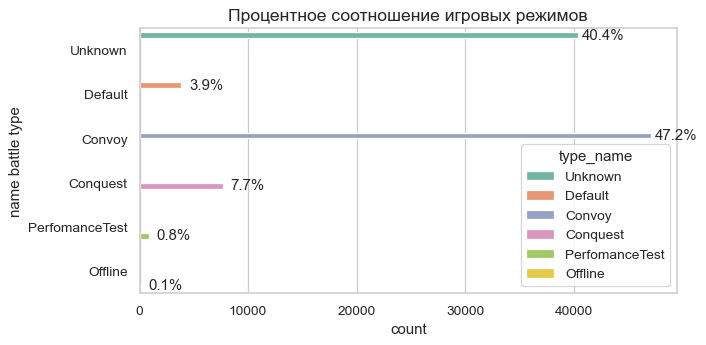

In [15]:
sns.set(context='notebook', style='whitegrid', palette='Set2', font='sans-serif', font_scale=1, color_codes=False, rc=None)

fig = plt.figure(figsize=(8, 4), dpi=90)
ax = sns.countplot(data=df, y='type_name', hue='type_name')
total_len = len(df)

for p in ax.patches:
    percentage = f'{(100 * p.get_width() / total_len):.1f}%'
    y = p.get_y() + p.get_height() / 2
    x = p.get_width()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(+20, 0), textcoords='offset points')
plt.title('Процентное соотношение игровых режимов', size=14)
plt.ylabel('name battle type', size=12)
plt.tight_layout();

**В режим Convoy сыграли 47,2% от общего количества игр. Возможно он самый популярный?**

<a id="карты"></a>
### Визуализируем распределение режимов по картам.

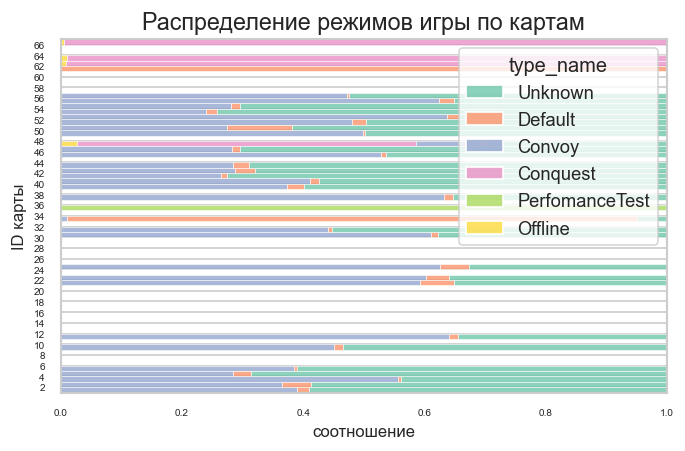

In [16]:
fig = plt.figure(figsize=(6, 4), dpi=120)

plt.title('Распределение режимов игры по картам', size=14)
ax2 = sns.histplot(data=df, y='map_type_id', hue='type_name', stat='count', bins=67, binwidth=1, multiple="fill", legend=True)
ax2.grid(axis='x')
from matplotlib.pyplot import MultipleLocator
y_major_locator=MultipleLocator(2)
ax2.yaxis.set_major_locator(y_major_locator)
params = {'legend.fontsize': 5,
          'legend.handlelength': 4}
plt.rcParams.update(params)
plt.ylabel('ID карты', fontsize=10)
plt.xlabel('соотношение', fontsize=10)
plt.tight_layout()

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(6);

- **Заметно, что в режимы Unknown и Convoy играют на одних и тех же картах;**
- **Conquest на №62-67 и №48. Perfomance Test на №35;**
- **Небольшой процент есть Default на большинстве карт;**
- **Offline заметен на картах, которые заполняет Сonquest.**
<br> Возможно эти моменты нам пригодятся как дополнительная информация в последующем</br>



<a id="свод1"></a>
### Сводная таблица показателей

In [17]:
df_type = df.groupby(['team_build_type_id'], as_index=True).agg(name = ('type_name', lambda x: list(x)[0]),
                                                number_of_games = ('arena_id', lambda x: len(x)),
                                                mean_duration_sec = ('duration_sec', lambda x: mean(x)),
                                                map_id = ('map_type_id', lambda x: mean(x)),
                                                battle_level = ('battle_level_id', lambda x: mean(x)))
                                                
df_type

,name,number_of_games,mean_duration_sec,map_id,battle_level
team_build_type_id,,,,,
0,Unknown,40367,815.032205,31.660812,6.447643
1,Default,3868,403.344623,31.602120,-1.000000
2,Convoy,47153,446.638793,31.548894,5.051428
3,PerfomanceTest,831,551.683514,35.000000,-1.000000
6,Conquest,7660,1003.807963,60.665796,5.999869
7,Offline,121,879.661157,54.123967,6.000000


**В режим Convoy сыграли больше раз, чем в Unknown. Но при этом средняя длительность игры в Convoy почти в два раза ниже. Пока что анализировали без учета игроков.**

<a id="соед"></a>
### Добавим некоторые данные из таблицы arena_members. 

In [18]:
sql = """
SELECT * FROM arena_members
WHERE account_db_id > 0
"""
df2 = pd.read_sql_query(sql, connection)
df2.head()

,arena_id,periphery_id,account_db_id,team_id,clan_db_id,vehicle_type_id,ships_killed,planes_killed,damage,team_damage,received_damage,regen_hp,max_hp,is_alive,distance,credits,exp
0,73990908078847,4624,2016609712,0,0,4289640432,2,0,42635,0,26801,0,26800,0,19.335600,46215,218
1,84393318869809,4624,2006412676,1,0,4185831216,1,0,22700,0,22700,0,22700,0,13.061000,21372,133
2,84393318869809,4624,2017934725,1,2000011717,4290721776,1,0,10829,0,43189,1689,41500,0,14.179700,13556,89
3,84393318869809,4624,2012327719,1,0,4185831248,2,0,41357,0,22900,0,22900,0,13.670000,28015,155
4,84393318869809,4624,2017892524,1,0,4269717488,0,0,17727,0,24000,0,24000,0,24.425699,15830,107


In [19]:
df2.shape[0]

1139375

In [20]:
t = df2[['arena_id', 'account_db_id', 'vehicle_type_id', 'credits', 'exp']]
df_new = t.merge(df, on='arena_id', how='inner')

In [21]:
df_new.head()

,arena_id,account_db_id,vehicle_type_id,credits,exp,periphery_id,winner_team_id,duration_sec,map_type_id,team_build_type_id,battle_level_id,type_name
0,73990908078847,2016609712,4289640432,46215,218,4624,1,418,37,2,5,Convoy
1,84393318869809,2006412676,4185831216,21372,133,4624,0,371,30,2,4,Convoy
2,84393318869809,2017934725,4290721776,13556,89,4624,0,371,30,2,4,Convoy
3,84393318869809,2012327719,4185831248,28015,155,4624,0,371,30,2,4,Convoy
4,84393318869809,2017892524,4269717488,15830,107,4624,0,371,30,2,4,Convoy


<a id="свод2"></a>
### Итоговая сводная таблица показателей

In [22]:
df_new_type = df_new.groupby(['team_build_type_id'], as_index=True).agg(name = ('type_name', lambda x: list(x)[0]),
                                                n_of_games = ('arena_id', lambda x: len(set(x))),
                                                mean_duration_s = ('duration_sec', lambda x: mean(x)),
                                                map_id = ('map_type_id', lambda x: mean(x)),
                                                battle_level = ('battle_level_id', lambda x: mean(x)),
                                                n_of_players = ('account_db_id', lambda x: len(x)),
                                                mean_credits = ('credits', lambda x: mean(x)),
                                                mean_exp = ('exp', lambda x: mean(x))) \
                                                .assign(mean_players = lambda x: x['n_of_players']/x['n_of_games']) \
                                                .assign(exp_sec = lambda x: x['mean_exp']/x['mean_duration_s'])
                                                                          
                                                
df_new_type

,name,n_of_games,mean_duration_s,map_id,battle_level,n_of_players,mean_credits,mean_exp,mean_players,exp_sec
team_build_type_id,,,,,,,,,,
0,Unknown,40367,873.373720,30.899155,7.179936,814878,94534.857082,793.049020,20.186737,0.908029
1,Default,3868,460.794165,31.956600,-1.000000,5553,36936.210877,336.359265,1.435626,0.729956
2,Convoy,47153,442.688830,31.304843,5.092017,263788,30281.400276,255.066171,5.594299,0.576175
3,PerfomanceTest,831,551.683514,35.000000,-1.000000,831,0.000000,0.000000,1.000000,0.000000
6,Conquest,7660,1003.807963,60.665796,5.999869,53620,89185.534390,870.238288,7.000000,0.866937
7,Offline,121,885.832624,53.924823,6.000000,705,115773.127660,1096.818440,5.826446,1.238178


**В целом по рассмотрению данных можно предположить
следующее:**
- **0 (Unknown) - рандомный режим PVP c количеством игроков примерно 20, а также высоким показателем получения опыта за единицу времени;**
- **1 (Default) - режим с ботами на 1-2 игрока;**
- **2 (Convoy) - типо блиц-режима;**
- **3 (PerfomanceTest) - не игровой режим;**
- **6 (Сonquest) - сценарный режим;**
- **7 (Offline)-дисконнект или если сопоставить с графиком карт, то АФК в типе 6 (Сonquest). ?Но при этом получено максимальное количество опыта в секунду;**


<a id="фгр1"></a>
### Выведем корреляции и построим график без явно "неигровых" типов 1, 3, 7.

In [23]:
s = df_new_type.loc[[0, 2, 6]]
s.reset_index().corr().style.background_gradient(cmap = "Greys")

,team_build_type_id,n_of_games,mean_duration_s,map_id,battle_level,n_of_players,mean_credits,mean_exp,mean_players,exp_sec
team_build_type_id,1.000000,-0.880039,0.402357,0.948734,-0.397329,-0.903408,0.114782,0.300817,-0.695883,0.076231
n_of_games,-0.880039,1.000000,-0.788853,-0.985028,-0.086140,0.591405,-0.572775,-0.717635,0.271352,-0.540605
mean_duration_s,0.402357,-0.788853,1.000000,0.671091,0.680249,0.029051,0.955616,0.994115,0.377465,0.943491
map_id,0.948734,-0.985028,0.671091,1.000000,-0.086905,-0.721566,0.422884,0.586831,-0.433217,0.387479
battle_level,-0.397329,-0.086140,0.680249,-0.086905,1.000000,0.752434,0.866005,0.755648,0.935528,0.884717
n_of_players,-0.903408,0.591405,0.029051,-0.721566,0.752434,1.000000,0.322254,0.137162,0.936599,0.358667
mean_credits,0.114782,-0.572775,0.955616,0.422884,0.866005,0.322254,1.000000,0.981907,0.633533,0.999250
mean_exp,0.300817,-0.717635,0.994115,0.586831,0.755648,0.137162,0.981907,1.000000,0.475558,0.973838
mean_players,-0.695883,0.271352,0.377465,-0.433217,0.935528,0.936599,0.633533,0.475558,1.000000,0.663017
exp_sec,0.076231,-0.540605,0.943491,0.387479,0.884717,0.358667,0.999250,0.973838,0.663017,1.000000


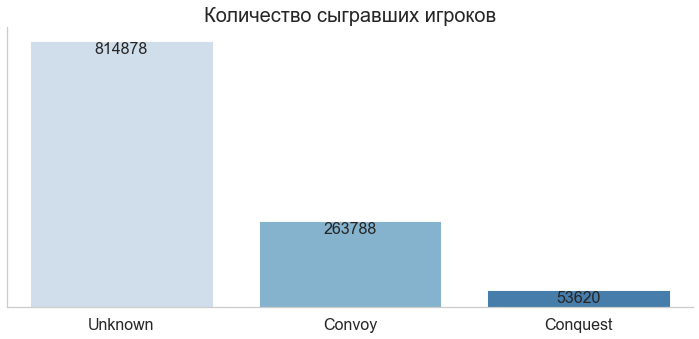

In [24]:
mpl.rcParams['font.size']=16
sns.catplot(x="name", y="n_of_players", data=s.reset_index(), ci=100,
                kind="bar", alpha=0.9, aspect=2, height=5, palette='Blues')
plt.title('Количество сыгравших игроков', fontsize= 20)
ax = plt.gca()
def autolabel_1(rects, fmt='.2f'):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        rect.axes.annotate(f'{{:{fmt}}}'.format(height),
                           xy=(rect.get_x()+rect.get_width()/2., height),
                           xytext=(0, -15), textcoords='offset points',
                           ha='center', va='bottom')

autolabel_1(ax.patches, '.0f')
ax.xaxis.set_tick_params(rotation=0, labelsize=16)
plt.yticks([])
plt.ylabel('', fontsize=14)
plt.xlabel('', fontsize=14)

plt.tight_layout();

<a id="заключение1"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #29728f; background-color: #ffffff;"><b>Заключение</b> по заданию 1.1:

<div style="background-color:#e8ecfc; padding:30px; font-size:15px;color:#29728f">
       
>**`1` Самый популярный режим 0 (Unknown). В бою учавствует в среднем 20 игроков, всего сыграло игроков 814878. При этом, по количеству игр уступает типу 2 (Convoy);**

>**`2` Второй по популярности тип 2(Convoy). В бою в среднем учавствует 5-6 игроков. Всего поиграли в этом режим 263788 игроков;**

>**`3` Третье место тип 6(Conquest). В бою учавствует 7 игроков. Всего поиграло в этом режиме 53620 геймеров 7660 раз.**

<hr style="border-width: 10px; border-color: #696969;">

<a id="1.2"></a>
# <div style="padding:12px;color:white;margin:0;font-size:30px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#29728f;overflow:hidden"><b>Задание 1.2</b></div>



><br>***Проанализируйте показатели эффективности кораблей, выбрав наиболее верную на Ваш взгляд методологию.***</br>

**Для анализа эффективности желательно соблюсти однородность выборки. В нашем случае в разных режимах игры может быть и разная тактика игры, количество игроков, урон, длительность и т.п. Поэтому ограничимся одним режимом игры. Также удалим ботов, ведь желательно посмотреть эффективность реальных игроков.**

**Извлечём из базы необходимые данные и удалим ненужные.**

**Срез данных сделаем по самому популярному режиму 0(Unknown)**

In [25]:
sql_2 = """
        SELECT * FROM arenas
        JOIN arena_members
        USING (arena_id)
        LEFT JOIN (SELECT cat_name AS type_name, cat_value
        FROM catalog_items
        WHERE cat_type = 'BATTLE_TYPE') t
        ON arenas.team_build_type_id = t.cat_value
        LEFT JOIN (SELECT item_cd, item_class AS ship_class,
                          item_name AS ship_name, item_level AS ship_level
        FROM glossary_ships) s
        ON arena_members.vehicle_type_id = s.item_cd
        WHERE account_db_id >0 AND type_name = 'Unknown';
        """
dfs = pd.read_sql_query(sql_2, connection)

In [26]:
dfs.drop(['periphery_id', 'start_dt', 'team_build_type_id', 'vehicle_type_id', 
          'cat_value', 'type_name', 'clan_db_id', 'map_type_id'], axis=1, inplace=True)
dfs.head(3)

,arena_id,winner_team_id,duration_sec,battle_level_id,account_db_id,team_id,ships_killed,planes_killed,damage,team_damage,...,regen_hp,max_hp,is_alive,distance,credits,exp,item_cd,ship_class,ship_name,ship_level
0,48748939918,1,758,9,2003826546,1,1,0,52495,0,...,0,35600,1,31.721901,96196,1017,4182685520,Cruiser,Algérie,7
1,48748939918,1,758,9,2004356327,0,0,0,6535,2,...,0,39100,0,27.280500,57743,397,4285445840,Cruiser,Mogami,8
2,48748939918,1,758,9,2004428867,1,1,0,8012,0,...,0,15100,1,63.373600,87931,1091,4076746448,Destroyer,Kagero,8


In [27]:
dfs.columns

Index(['arena_id', 'winner_team_id', 'duration_sec', 'battle_level_id',
       'account_db_id', 'team_id', 'ships_killed', 'planes_killed', 'damage',
       'team_damage', 'received_damage', 'regen_hp', 'max_hp', 'is_alive',
       'distance', 'credits', 'exp', 'item_cd', 'ship_class', 'ship_name',
       'ship_level'],
      dtype='object')

<Figure size 1400x600 with 0 Axes>

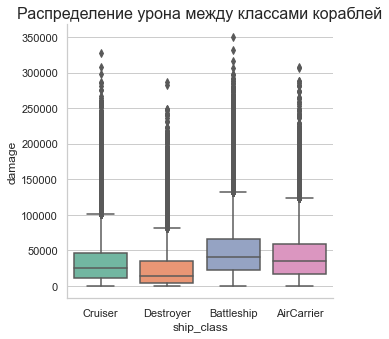

In [28]:
plt.figure(figsize=(14,6),dpi=100)
sns.catplot(data=dfs, y='damage', x='ship_class', kind='box', aspect=1)
plt.title('Распределение урона между классами кораблей', fontsize=16)
plt.tight_layout()
plt.show()

**Заметна разница распределения урона между классами по статистике всех игр. Больше всего урона наносил класс - Battleship (Линкоры), следом AirCarrier (Авианосцы), потом Сruiser (Крейсеры) и значительно меньше всех Destroyer (Эсминцы).**
<br>**Это наглядная информация, у нас не стоит задача сравнить классы**</br>

<a id="размышления"></a>
### Какая самая главная цель игры - побеждать. Какие факторы ведут к победе, кроме умений игрока, это - эффективность юнита.
Чем больше побеждает юнит, тем он эффективней. Однако наша игра командная, в которой закладывался принцип "камень-ножницы-бумага", а во-вторых, в команде врага, также могут присутствовать аналогичные юниты, что выравнивает соотношение побед/поражений.
<br></br>
<br>**Создадим колонку `win` и посмотрим корреляцию некоторых параметров к ней.**</br>

In [29]:
# Добавим колонку <победа> Если выиграл 1, если проиграл 0. 
dfs['win'] = np.where(dfs['team_id']==dfs['winner_team_id'], 1, 0)

>**В игре по идее зашиты сквозные метрики эффективности юнитов `exp` и `credits`. Можно было бы ограничиться ими, но это простой путь. Давайте посмотрим корреляции данных признаков.**

In [30]:
dfs['credits'].corr(dfs['exp'])

0.8241241105376516

In [31]:
dfs['exp'].corr(dfs['win'])

0.572798940907727

In [32]:
dfs['exp'].corr(dfs['damage'])

0.7138523831913861

In [33]:
dfs['exp'].corr(dfs['ships_killed'])

0.4846146785127963

**Но при этом незначительная корреляция остальных не сгруппированных данных к win**

In [34]:
dfs['ships_killed'].corr(dfs['win'])

0.2032095831111786

In [35]:
dfs['damage'].corr(dfs['win'])

0.136627789965561

### Вопрос: как измерить эффективной кораблей без `exp` u `credits`.

**На основе имеющихся данных, выведем средние показатели по всем юнитам, а также добавим новые.**

<a id="свод_показателей"></a>
### Создадим сводную таблицу показателей кораблей основанную на статистики всех игр.
<br>**Описание показателей:**</br>
- **level** - уровень корабля
- **wins** - соотношение побед к поражениям
- **is_alive** - соотношение "выжил" к к-ву игр
- **KILLS** - среднее количество убитых кораблей
- **planes_killed** - всего убито самолетов
- **m_exp** - средний полученный опыт
- **m_damage** - средний нанесенный урон за игру
- **m_max_hp** - средние максимальное HP корабля
- **m_regen_hp** - среднее восстановленное HP корабля за игру
- **m_received_damage** - средний полученный урон за игру

<br>Дополним вычисленными:</br>
- **DPS** - средний игровой (статистический) наносимый урон в секунду
- **POWER** - средняя игровая (статистическая) сила корабля
<br>**POWER = (DPS * (m_max_hp + m_regen_hp * 0.8))/1000**, где 0,8 - поправочный коэффициент к восстановлению HP (считаю, что это дополнительная способность занимающая время)</br>
- **EFF** - условная эффективность корабля
<br>**EFF = KILLS + is_alive** (введена после просмотра значений корреляций)</br>

In [36]:
dfs_ind = dfs.groupby(['ship_name'], as_index=False).agg(class_ship = ('ship_class', lambda x: list(x)[0]),
                                                level = ('ship_level', lambda x: list(x)[0]),
                                                n_of_games = ('arena_id', lambda x: len(set(x))),
                                                wins = ('win', lambda x: round(mean(x), 2)),
                                                is_alive = ('is_alive', lambda x: round(mean(x), 2)),
                                                KILLS = ('ships_killed', lambda x: round(mean(x), 4)),
                                                planes_killed = ('planes_killed', lambda x:round(mean(x), 2)),
                                                duration = ('duration_sec', lambda x: round(mean(x), 2)),
                                                m_exp = ('exp', lambda x: round(mean(x), 2)),
                                                m_damage = ('damage', lambda x: round(mean(x), 2)),
                                                m_max_hp = ('max_hp', lambda x: round(mean(x), 2)),
                                                m_regen_hp = ('regen_hp', lambda x: round(mean(x), 2)),
                                                m_received_damage = ('received_damage', lambda x: round(mean(x), 2))) \
                                        .assign(DPS = lambda x: round(x['m_damage']/x['duration'], 1)) \
                                .assign(POWER = lambda x: round((x['DPS']*(x['m_max_hp']+x['m_regen_hp']*0.8))/10000, 1)) \
                                .assign(EFF = lambda x: round(x['KILLS']+x['is_alive'], 2))

In [37]:
dfs_ind.head(3)

,ship_name,class_ship,level,n_of_games,wins,is_alive,KILLS,planes_killed,duration,m_exp,m_damage,m_max_hp,m_regen_hp,m_received_damage,DPS,POWER,EFF
0,ARP Ashigara,Cruiser,7,945,0.51,0.29,0.5000,1.03,890.11,822.00,32090.19,39393.81,0.0,33850.19,36.1,142.2,0.79
1,ARP Haguro,Cruiser,7,675,0.51,0.34,0.5568,1.10,880.84,824.31,33134.21,39362.16,0.0,32819.96,37.6,148.0,0.90
2,ARP Haruna,Battleship,5,1158,0.53,0.41,0.6849,1.53,896.60,739.59,37877.43,54343.45,12461.1,53243.04,42.2,271.4,1.09


<a id="кор_пир"></a>
**Посмотрим корреляцию Пирсона**

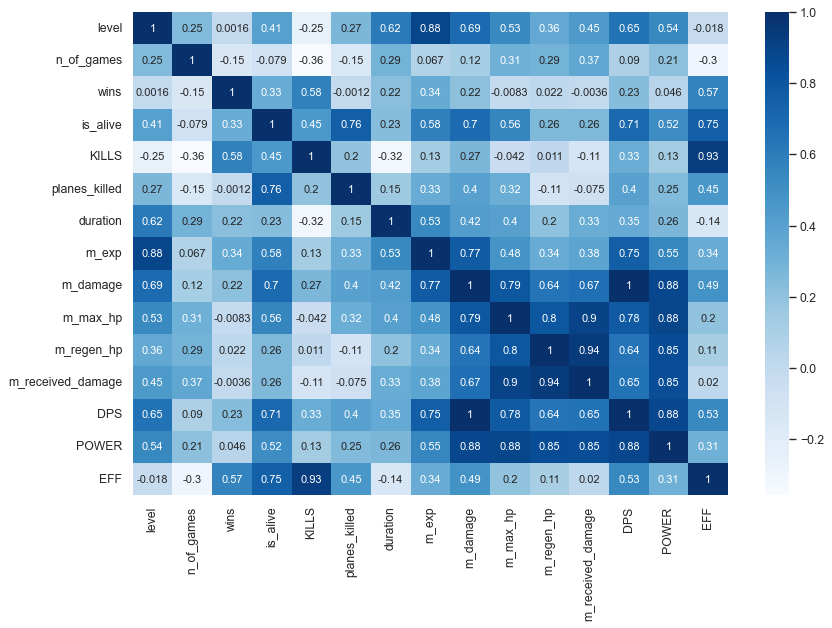

In [38]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(dfs_ind.corr(), annot=True, cmap='Blues');
# ax = plt.gca()
# ax.xaxis.set_tick_params(rotation=0, labelsize=10);

- **Обратим внимание на центральный показатель m_exp, хорошая корреляция level и DPS, что объясняется необходимостью помимо прочего, увеличивать количество получаемого опыта с повышением уровнем юнита (игры). Но почти отсутствие линейной зависимости с KILLS и небольшая с win**
- **Отметим незначительную корреляцию KILLS и EFF с Level корабля, но существенную с WINS. И наоборот, у DPS&POWER хорошую корреляцию с Level, но незначительную с WINS.**
- **Имеется индивидуальная корреляция is_alive и planes_killed Должно быть это связано с авианосцами**
- **Вообще is_alive неплохой средний параметр, завязанный на всех других показателях. Поэтому он был добавлен к KILLS для получения корреляции к многочисленным показателям здоровья**

<a id="кор_фик"></a>
**Посмотрим на корреляцию Phik, основанную на хи-квадрат статистики**

interval columns not set, guessing: ['level', 'n_of_games', 'wins', 'is_alive', 'KILLS', 'planes_killed', 'duration', 'm_exp', 'm_damage', 'm_max_hp', 'm_regen_hp', 'm_received_damage', 'DPS', 'POWER', 'EFF']


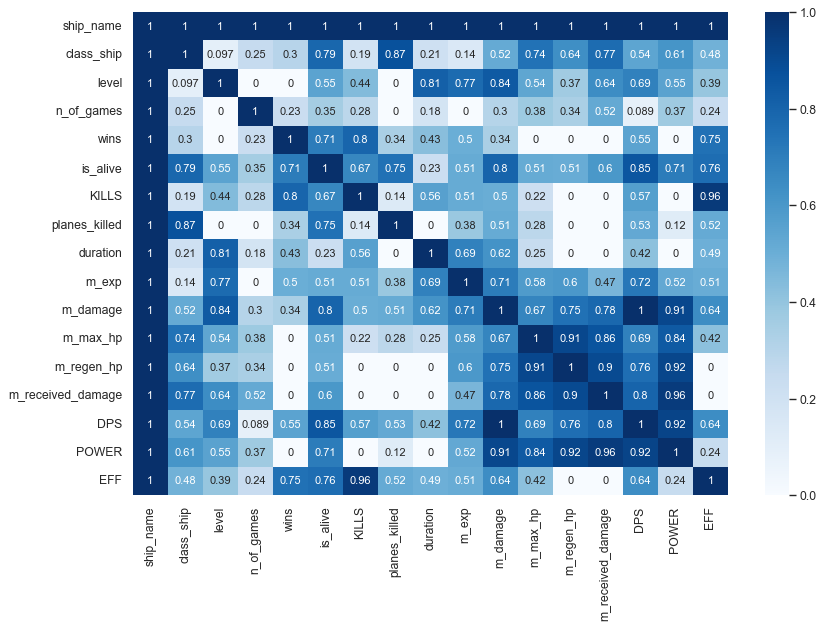

In [39]:
phik_overview = dfs_ind.phik_matrix()
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(phik_overview, annot=True, cmap='Blues')
plt.show()

- **Обратим внимание на центральный показатель m_exp, хорошая нелинейная корреляция со всеми показателями, особенно с level и DPS, а также рост корреляции с win и KILLS;**
- **В сравнении с линейной корреляцией Пирсона, отметим подросшую корреляцию KILLS и EFF с Level корабля. А у  DPS появилась очень хорошая корреляция с Level, а также у DPS появилась хорошая корреляция с WINS.**
<hr style="border-width: 4px; border-color: #696969;">

<a id="показ"></a>
***Субъективно в нашей игре можно разделить эффективность, которая важна игрокам (победа, килы, комфортность использования, опыт), и которая важна для матча (урон, HP, выживаемость, назначение юнита (например эсминец как убийца линкоров), командная игра). Вот эти эффективности редко совпадают в рандомном режиме, потому что каждый играет сам за себя.
Возможно этим объясняется "низкая" зависимость по кор.Пирса к примеру, таких вроде "созависимых" признаков как KILLS от DPS.***

**С целью максимально задействовать все признаки в нескольких,  останавливаемся на следующих показателях:**
>1. **KILLS** (влияет на win, нелинейно на выживаемость (is_alive), мало зависит от уровня юнита(level), один из основных показателей для рейтингов геймеров)
>2. **EFF** (влияет на win, завязан на (is_alive+Kills), мало зависит от level юнита)
>3. **DPS** (статистически сложившаяся средняя характеристика юнита - урон за единицу времени (сек), есть связь c level, is_alive, c показателями на HP, нелинейная связь с win)
>4. **POWER** (полученный показатель силы юнита, где учтено показатели HP помноженные на DPS, есть связь c level, не связан с win, но связан с выживаемостью is_alive)
<p>Симметричность Корреляций между ними:</p>
<p>KILLS <<0,93>> EFF <<0.53>> DPS <<0.88>> POWER</p>

<p>KILLS 0.33 DPS || POWER 0.31 EFF || KILLS 0.13 POWER</p>

#### Разделим данные по 2 уровня для удобства визуализации и сравнения и отобразим

In [40]:
levels = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
dfs_ind_12 = dfs_ind.query('level == @levels[0]').reset_index()
dfs_ind_34 = dfs_ind.query('level == @levels[1]').reset_index()
dfs_ind_56 = dfs_ind.query('level == @levels[2]').reset_index()
dfs_ind_78 = dfs_ind.query('level == @levels[3]').reset_index()
dfs_ind_910 = dfs_ind.query('level == @levels[4]').reset_index()

<a id="виз"></a>
### Типизированная визуализация для всех параметров на выбор

### Визуализация 1: График для сравнения с разделением уровней кораблей

In [41]:
# функция графика бар на основе библиотеки plotly
def level_bar(dfs, col, level1, level2, title, width=650, height=500, h=+1.08):
    fig = make_subplots(specs=[[{"secondary_y": False}, {"secondary_y": True}]],  
                  horizontal_spacing=0,
                  shared_yaxes=False,
                  rows=1, cols=2, print_grid=True )
    dfs.sort_values(by=col, ascending=True, inplace=True)
    x1 = dfs.query('level == @level1')[col]
    y1=dfs.query('level == @level1')['ship_name']
    c1=dfs.query('level == @level1')['class_ship']
    text1 = [f'{t}'  for t in c1]
    fig.add_trace(go.Bar(orientation ='h', 
                     x=x1,
                     y=y1,
                     name=level1,
                     text=x1,
                     hovertemplate=text1,
                     textposition='inside',
                     marker_color='#29728f'), 1, 1)

    x2=dfs.query('level == @level2')[col]
    y2=dfs.query('level == @level2')['ship_name']
    c2=dfs.query('level == @level2')['class_ship']
    text2 = [f'{t}'  for t in c2]
    fig.add_trace(go.Bar(orientation ='h', 
                     x=x2,
                     y=y2,
                     name=level2,
                     text=x2,
                     hovertemplate=text2,
                     textposition='inside',
                     marker_color='#7171e1'), 1, 2, secondary_y=True)

    fig.update_layout(width=width, height=height,
                  xaxis_showticklabels=False,
                  title=title,
                  title_x = 0.5, font_size=14,
                  xaxis_title='',
                  xaxis2_autorange='reversed',
                  xaxis2_showticklabels=False,
                  yaxis3_showticklabels=True,
                  legend=dict(x=0.45, y=+float(h), yanchor="top", xanchor="center", orientation="h"),
                  margin=dict(l=150, r=0, t=70, b=0))
#     py.image.save_as(fig, filename='KILLS.png')
    fig.show()


### Визуализация 2: График для сравнения с выделением  цветом класса корабля

In [42]:
# Установки графика
sns.set(context='notebook', style='whitegrid', palette='Set2', font='sans-serif', font_scale=1, color_codes=False)
plt.style.use('default')
font_color = '#525252'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
colors = ['#FFA07A', '#5F9EA0', '#DA70D6', '#66CDAA']
# plt.rcParams['font.size'] = '9'
sns.set(rc={"axes.facecolor":"#e8ecfc","figure.facecolor":"#e8ecfc"})
plt.rcParams.update({'font.size': 7})

# Функция для аннотаций.
def autolabel(rects, fmt='.2f'):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        rect.axes.annotate(f'{{:{fmt}}}'.format(height),
                           xy=(rect.get_x()+rect.get_width()/2., height),
                           xytext=(0, +15), textcoords='offset points',
                           ha='center', va='bottom')

        
# Функция для создания графика для нашего df.
def class_bar(dfs, col, title, fmt='.0f'):
    
    ax = sns.catplot(data=dfs.sort_values(by=col, ascending=False), x='ship_name', y=col, 
                  kind='bar', hue='class_ship', aspect=2)
    ax.set_axis_labels("", "", color=font_color, **hfont)
    ax.legend.set_title("")
    plt.title(title, fontsize= 20, color=font_color, **hfont)
    plt.xticks(rotation=90, color=font_color, **hfont)
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax = plt.gca()
     
    autolabel(ax.patches, fmt);

<a id="12"></a>
### Корабли 1 и 2 уровней

In [43]:
dfs_ind_12.sort_values(by='m_exp', ascending=False).head()

,index,ship_name,class_ship,level,n_of_games,wins,is_alive,KILLS,planes_killed,duration,m_exp,m_damage,m_max_hp,m_regen_hp,m_received_damage,DPS,POWER,EFF
13,146,Longjiang,Destroyer,2,20,0.80,0.80,2.2000,0.0,682.00,840.00,42171.80,7835.00,0.0,4430.05,61.8,48.4,3.00
9,64,Erie,Cruiser,1,761,0.50,0.36,1.4031,0.0,478.38,526.41,8204.05,4955.71,0.0,3956.00,17.1,8.5,1.76
0,15,Albany,Cruiser,2,56,0.46,0.22,0.8814,0.0,765.17,498.76,18730.66,16500.00,0.0,14669.49,24.5,40.4,1.10
20,213,Tachibana,Destroyer,2,780,0.51,0.30,0.7451,0.0,709.37,492.11,14110.57,7075.20,0.0,5852.22,19.9,14.1,1.05
10,94,Hashidate,Cruiser,1,856,0.52,0.41,1.3574,0.0,487.15,492.01,7834.66,5173.49,0.0,3957.63,16.1,8.3,1.77


In [44]:
level_bar(dfs_ind_12, 'KILLS', 1, 2, 'KILLS')

This is the format of your plot grid:
[ (1,1) x,y      ]  [ (1,2) x2,y2,y3 ]



In [45]:
level_bar(dfs_ind_12, 'POWER', 1, 2, "POWER")

This is the format of your plot grid:
[ (1,1) x,y      ]  [ (1,2) x2,y2,y3 ]



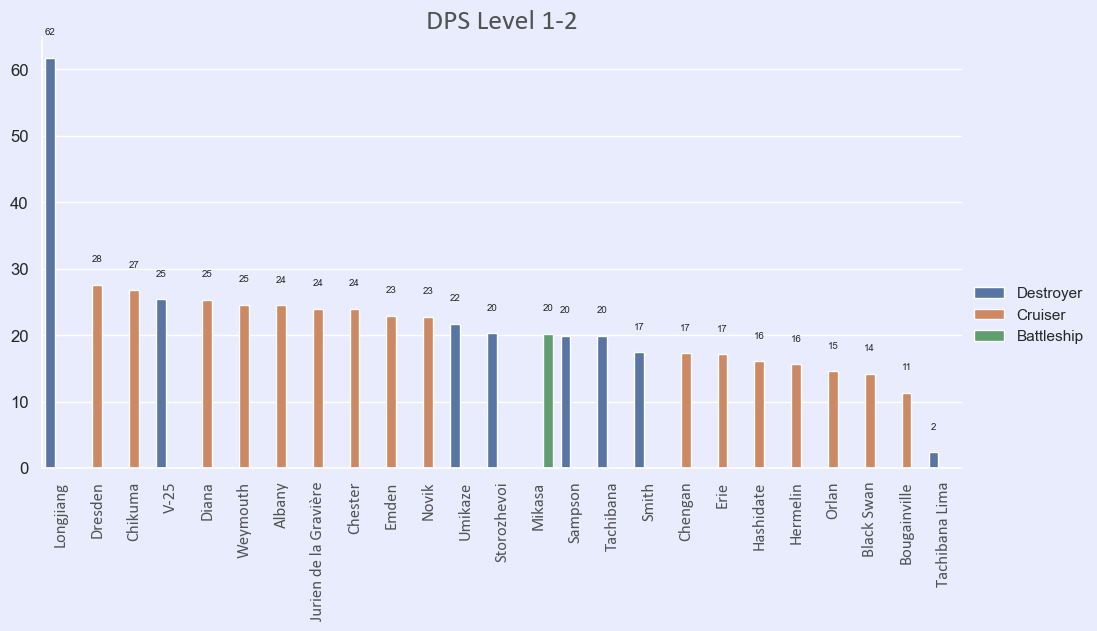

In [46]:
class_bar(dfs_ind_12, 'DPS', "DPS Level 1-2")

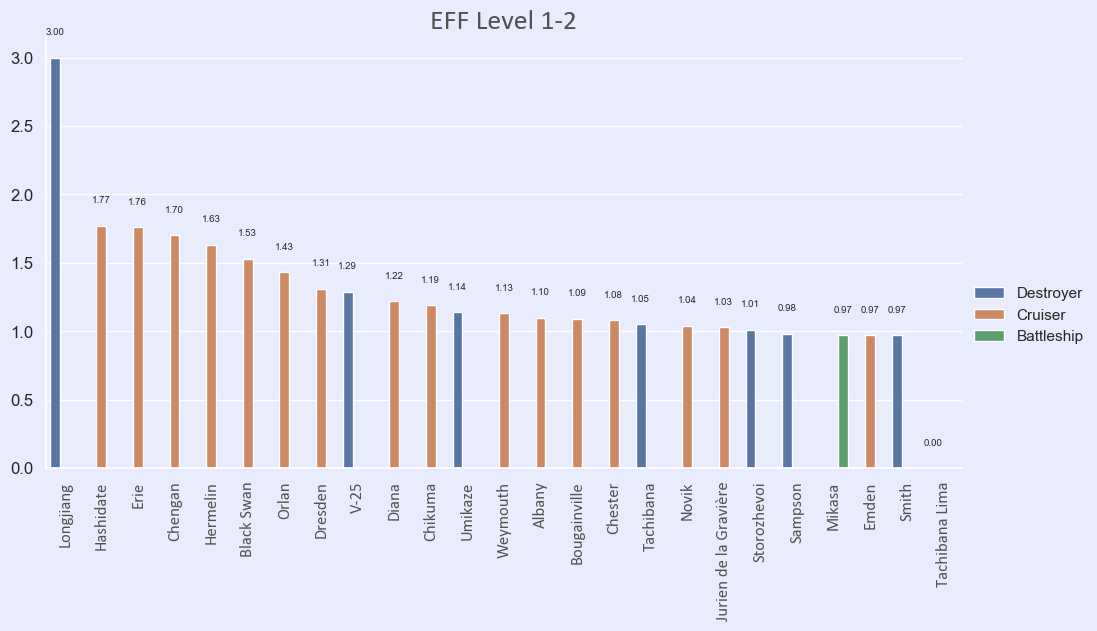

In [47]:
class_bar(dfs_ind_12, 'EFF', "EFF Level 1-2", fmt='.2f')

<a id="34"></a>
### Корабли 3 и 4 уровней

In [48]:
dfs_ind_34.sort_values(by='m_exp', ascending=False).head()

,index,ship_name,class_ship,level,n_of_games,wins,is_alive,KILLS,planes_killed,duration,m_exp,m_damage,m_max_hp,m_regen_hp,m_received_damage,DPS,POWER,EFF
31,188,Phra Ruang,Destroyer,3,21,0.67,0.33,1.4762,0.10,832.43,759.19,23331.48,8950.00,0.00,7939.81,28.0,25.1,1.81
0,21,Arkansas Beta,Battleship,4,549,0.54,0.49,1.2589,0.00,896.83,696.39,49852.39,43919.15,10395.89,40892.35,55.6,290.4,1.75
13,106,Imperator Nikolai I,Battleship,4,248,0.64,0.50,1.3448,0.05,860.32,693.47,52700.82,44907.28,12720.02,44332.57,61.3,337.7,1.84
16,113,Iwaki Alpha,Cruiser,4,65,0.54,0.29,1.1692,0.51,887.05,693.45,36000.55,18729.23,0.00,15668.15,40.6,76.0,1.46
41,231,Yūbari,Cruiser,4,749,0.58,0.37,0.8657,2.40,890.54,669.53,28353.46,18825.98,0.00,14891.71,31.8,59.9,1.24


In [49]:
level_bar(dfs_ind_34, 'KILLS', 3, 4, 'KILLS')

This is the format of your plot grid:
[ (1,1) x,y      ]  [ (1,2) x2,y2,y3 ]



In [50]:
level_bar(dfs_ind_34, 'POWER', 3, 4, "POWER")

This is the format of your plot grid:
[ (1,1) x,y      ]  [ (1,2) x2,y2,y3 ]



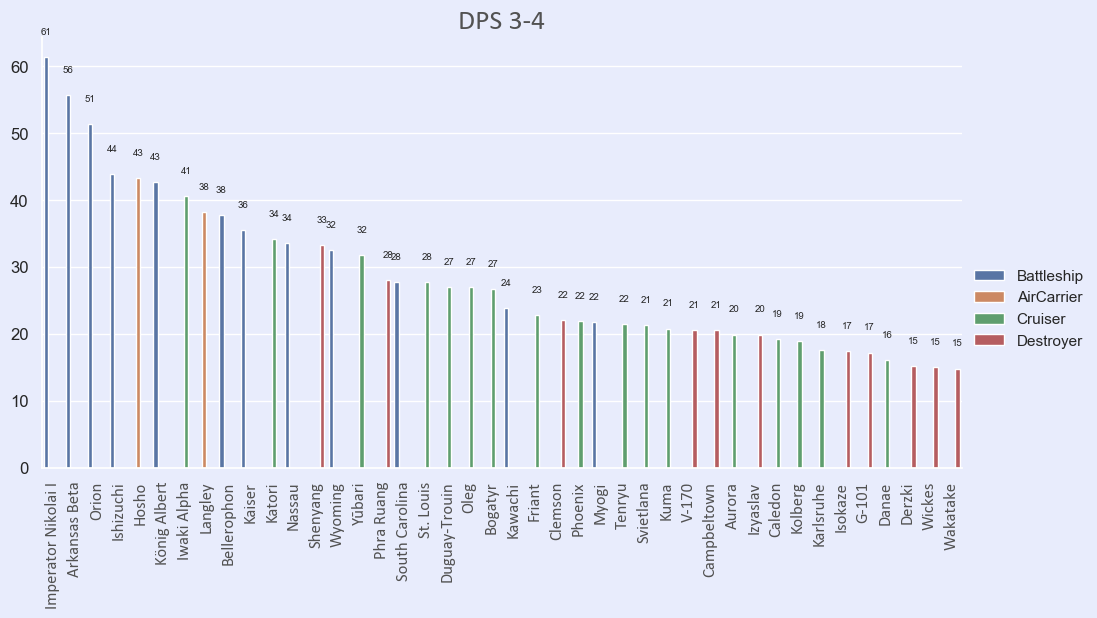

In [51]:
class_bar(dfs_ind_34, 'DPS', "DPS 3-4")

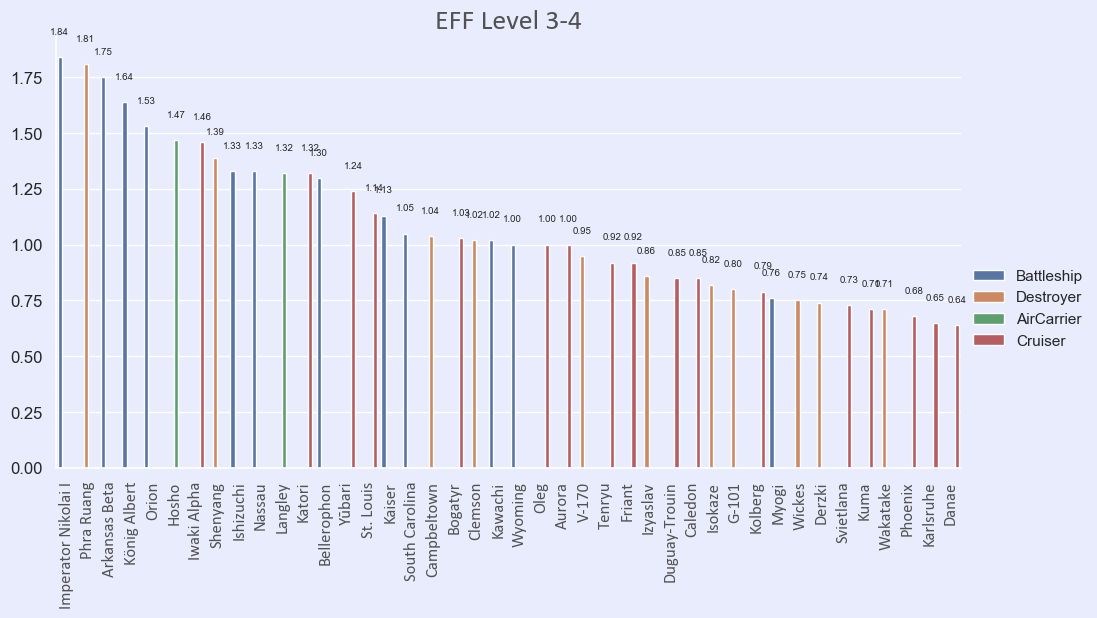

In [52]:
class_bar(dfs_ind_34, 'EFF', "EFF Level 3-4", fmt='.2f')

<a id="56"></a>
### Корабли 5 и 6 уровней

In [53]:
dfs_ind_56.sort_values(by='m_exp', ascending=False).head()

,index,ship_name,class_ship,level,n_of_games,wins,is_alive,KILLS,planes_killed,duration,m_exp,m_damage,m_max_hp,m_regen_hp,m_received_damage,DPS,POWER,EFF
24,84,Giulio Cesare,Battleship,5,45,0.73,0.42,1.6667,2.27,868.78,1186.07,82563.93,45500.00,14331.42,50909.13,95.0,541.2,2.09
20,75,Fushun,Destroyer,6,17,0.59,0.47,0.6471,0.18,945.47,1063.29,31416.12,14964.71,0.00,12095.00,33.2,49.7,1.12
26,88,Gremyashchy,Destroyer,5,473,0.61,0.45,1.0726,0.44,881.43,991.66,32139.07,13699.80,0.00,10630.91,36.5,50.0,1.52
22,77,Fūjin,Destroyer,5,378,0.61,0.48,1.1082,0.01,869.37,919.62,33651.03,11641.24,0.00,8328.26,38.7,45.1,1.59
59,202,Shinonome,Destroyer,6,1355,0.58,0.40,0.8481,0.00,878.91,905.51,26585.48,13811.24,0.00,11154.96,30.2,41.7,1.25


In [54]:
level_bar(dfs_ind_56, 'KILLS', 5, 6, 'KILLS', 800, 700, h=1.06)

This is the format of your plot grid:
[ (1,1) x,y      ]  [ (1,2) x2,y2,y3 ]



In [55]:
level_bar(dfs_ind_56, 'POWER', 5, 6, "POWER", 800, 700, h=1.06)

This is the format of your plot grid:
[ (1,1) x,y      ]  [ (1,2) x2,y2,y3 ]



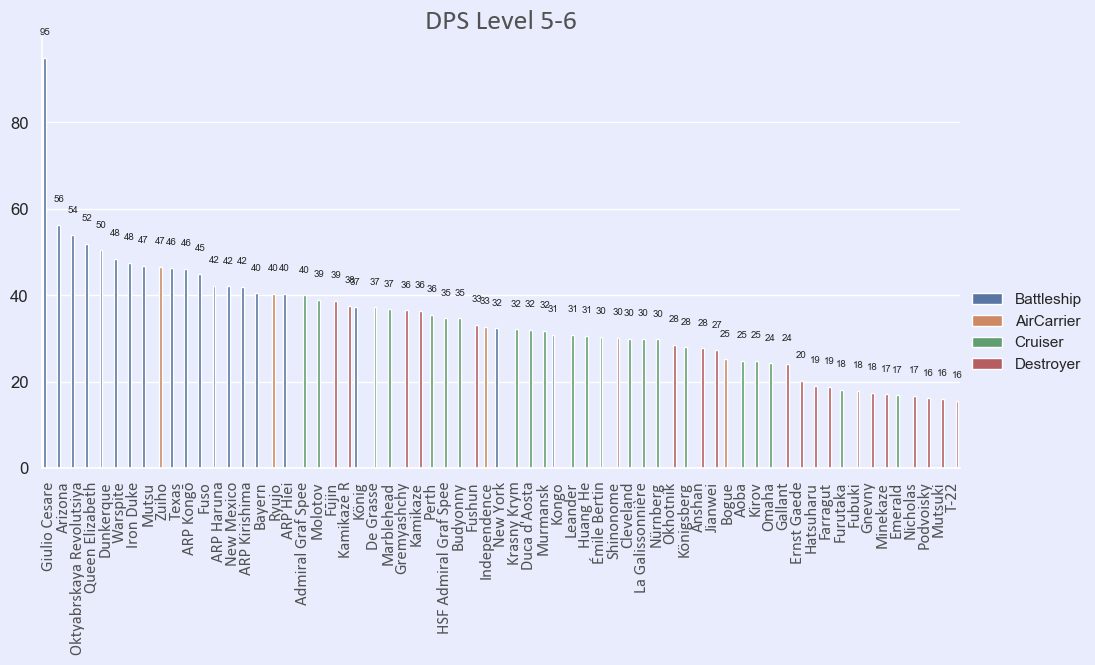

In [56]:
class_bar(dfs_ind_56, 'DPS', "DPS Level 5-6")

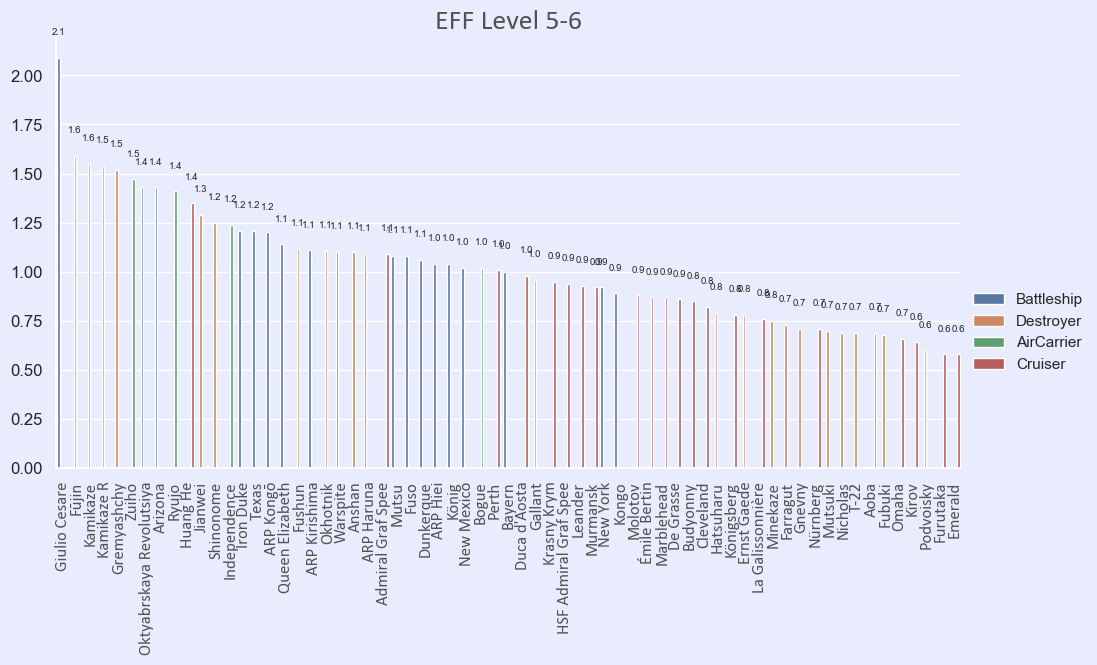

In [57]:
class_bar(dfs_ind_56, 'EFF', "EFF Level 5-6", fmt='.1f')

<a id="78"></a>
### Корабли 7 и 8 уровней

In [58]:
dfs_ind_78.sort_values(by='m_exp', ascending=False)

,index,ship_name,class_ship,level,n_of_games,wins,is_alive,KILLS,planes_killed,duration,m_exp,m_damage,m_max_hp,m_regen_hp,m_received_damage,DPS,POWER,EFF
24,70,Flint,Cruiser,7,96,0.81,0.60,1.3299,12.33,809.15,1437.02,58192.79,26827.32,0.0,18257.06,71.9,192.9,1.93
22,63,Enterprise,AirCarrier,8,657,0.56,0.85,1.1009,20.76,898.35,1125.80,70953.97,51400.00,0.0,13060.11,79.0,406.1,1.95
59,196,Saipan,AirCarrier,7,1728,0.61,0.82,1.0881,24.43,880.47,1125.21,50119.71,44600.00,0.0,12528.45,56.9,253.8,1.91
64,205,Sims,Destroyer,7,2513,0.57,0.41,0.6212,1.99,888.33,1085.24,21638.58,15027.22,0.0,12119.80,24.4,36.7,1.03
49,159,Monarch,Battleship,8,3385,0.52,0.51,0.7476,1.04,888.84,1049.51,66721.47,58794.53,20774.7,62478.11,75.1,566.4,1.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,155,Minsk,Destroyer,7,1025,0.48,0.27,0.4924,0.26,884.84,789.80,21463.59,15272.66,0.0,13339.95,24.3,37.1,0.76
65,208,Southern Dragon,Cruiser,7,289,0.45,0.27,0.4232,1.00,877.24,787.51,30661.60,39400.68,0.0,34121.92,35.0,137.9,0.69
6,11,Akatsuki,Destroyer,7,7173,0.49,0.29,0.5388,0.31,885.02,777.90,20977.36,13257.75,0.0,11242.63,23.7,31.4,0.83
50,166,Myoko,Cruiser,7,6162,0.47,0.33,0.4639,0.80,896.06,764.73,28982.82,39153.92,0.0,32701.55,32.3,126.5,0.79


In [59]:
level_bar(dfs_ind_78, 'KILLS', 7, 8, 'KILLS', 800, 700, h=1.06)

This is the format of your plot grid:
[ (1,1) x,y      ]  [ (1,2) x2,y2,y3 ]



In [60]:
level_bar(dfs_ind_78, 'POWER', 7, 8, "POWER", 800, 700, h=1.06)

This is the format of your plot grid:
[ (1,1) x,y      ]  [ (1,2) x2,y2,y3 ]



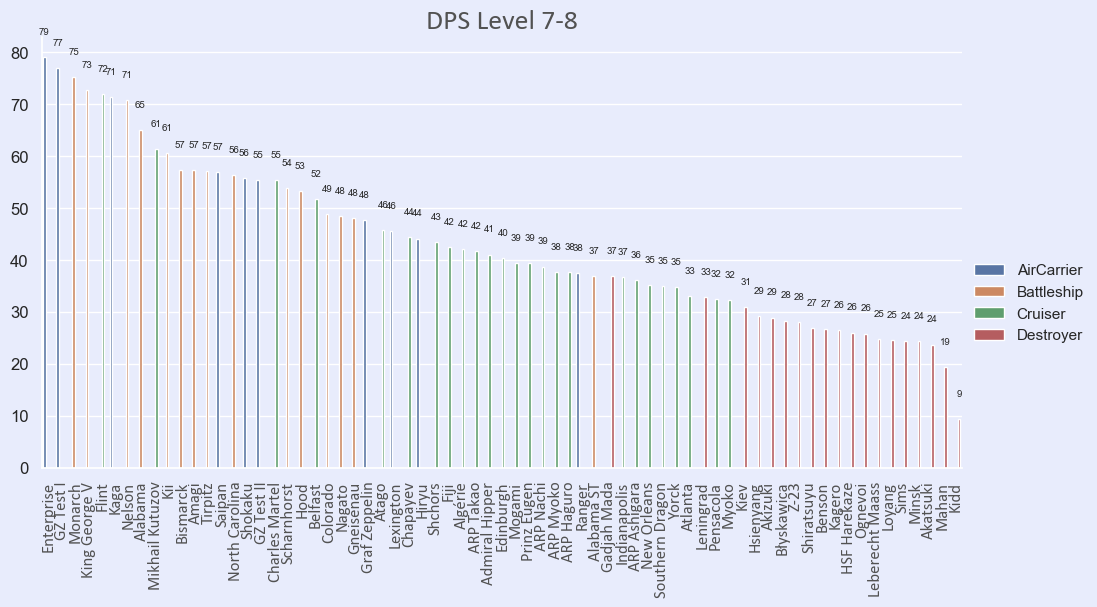

In [61]:
class_bar(dfs_ind_78, 'DPS', "DPS Level 7-8")

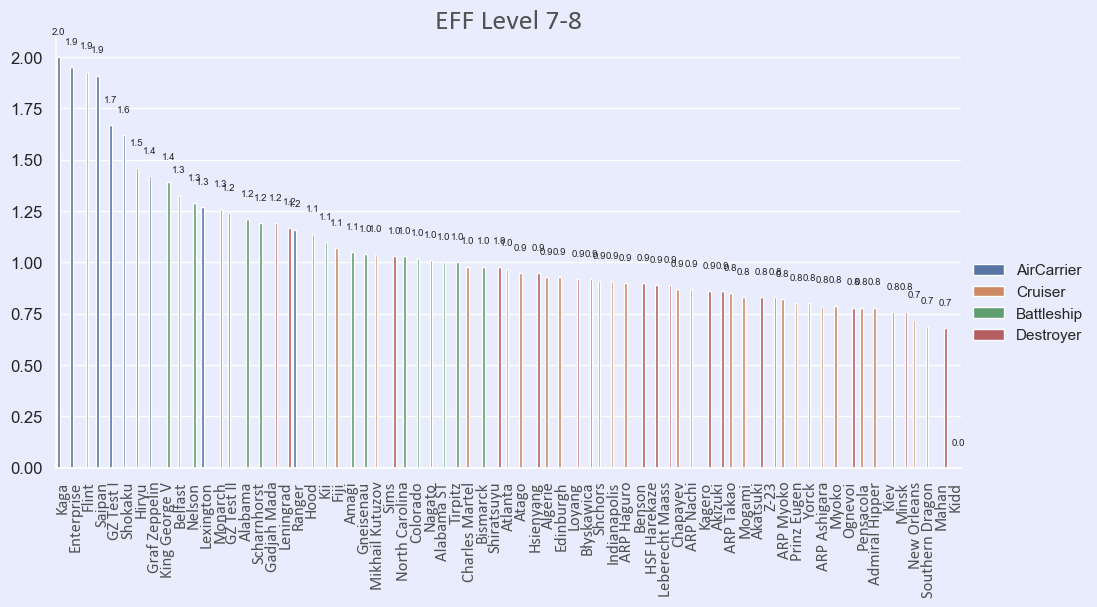

In [62]:
class_bar(dfs_ind_78, 'EFF', "EFF Level 7-8", fmt='.1f')

<a id="910"></a>
### Корабли 9 и 10 уровней

In [63]:
dfs_ind_910.sort_values(by='m_exp', ascending=False).head()

,index,ship_name,class_ship,level,n_of_games,wins,is_alive,KILLS,planes_killed,duration,m_exp,m_damage,m_max_hp,m_regen_hp,m_received_damage,DPS,POWER,EFF
1,31,Black,Destroyer,9,101,0.68,0.59,1.0990,0.78,882.72,1392.72,47921.19,19532.67,0.00,14743.91,54.3,106.1,1.69
21,150,Midway,AirCarrier,10,328,0.44,0.80,1.0741,27.11,880.92,1261.90,88154.94,67640.51,0.00,22026.96,100.1,677.1,1.87
12,93,Hakuryu,AirCarrier,10,326,0.56,0.84,1.3271,19.94,874.40,1255.12,90736.76,63100.00,0.00,17184.24,103.8,655.0,2.17
3,49,Conqueror,Battleship,10,2898,0.52,0.60,0.8169,1.09,887.17,1218.06,110153.70,83062.59,49625.05,105180.26,124.2,1524.7,1.42
15,102,Hsiangyang,Destroyer,10,91,0.63,0.44,0.9255,0.43,892.56,1213.71,54135.64,20398.94,0.00,17171.90,60.7,123.8,1.37


In [64]:
level_bar(dfs_ind_910, 'KILLS', 9, 10, 'KILLS')

This is the format of your plot grid:
[ (1,1) x,y      ]  [ (1,2) x2,y2,y3 ]



In [65]:
level_bar(dfs_ind_910, 'POWER', 9, 10, "POWER")

This is the format of your plot grid:
[ (1,1) x,y      ]  [ (1,2) x2,y2,y3 ]



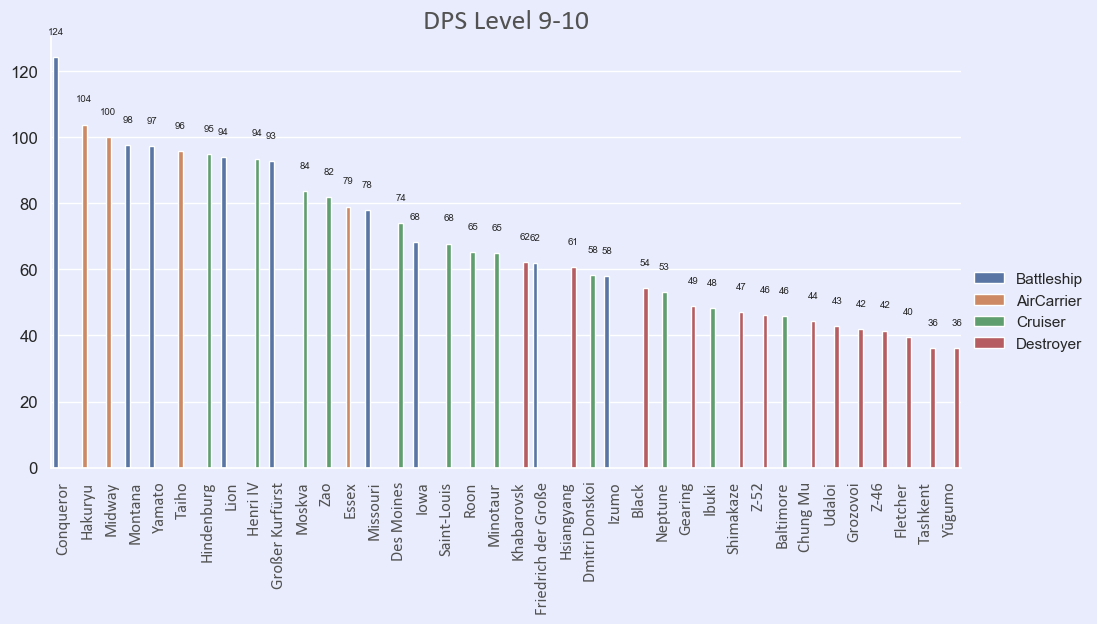

In [66]:
class_bar(dfs_ind_910, 'DPS', "DPS Level 9-10")

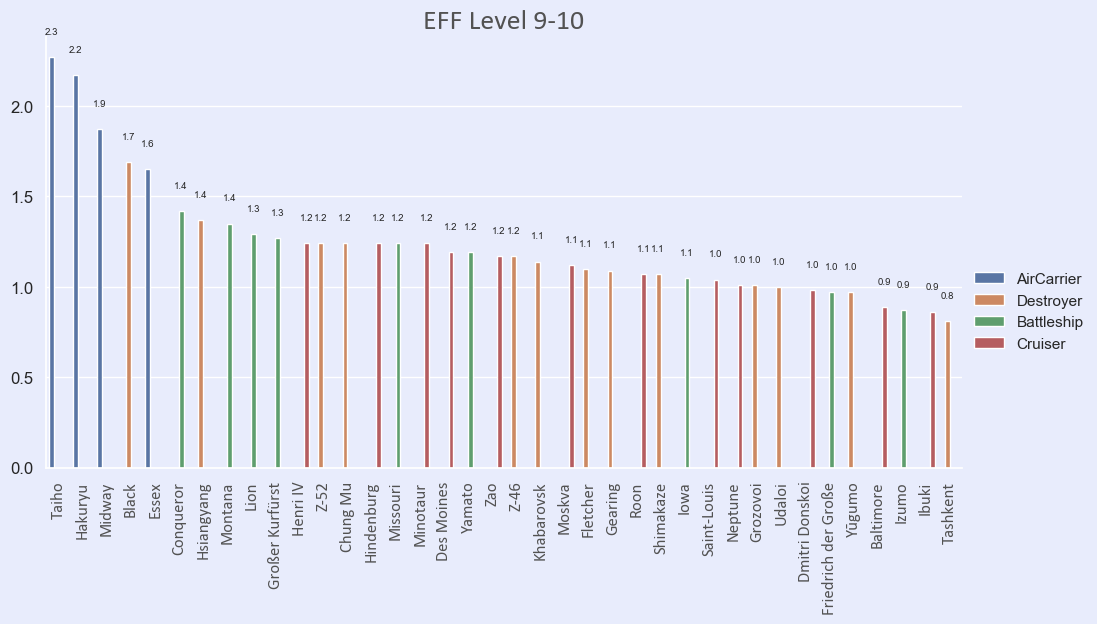

In [67]:
class_bar(dfs_ind_910, 'EFF', "EFF Level 9-10", fmt='.1f')

<a id="ранж"></a>
### Проранжируем наши показатели эффективности с учетом размера (без dense)

In [68]:
dfs_ind['KILLS_rank'] = dfs_ind['KILLS'].rank()
dfs_ind['EFF_rank'] = dfs_ind['EFF'].rank()
dfs_ind['DPS_rank'] = dfs_ind['DPS'].rank()
dfs_ind['POWER_rank'] = dfs_ind['POWER'].rank()

**Просуммируем полученные ранги в колонку TOTAL_rank**

In [69]:
dfs_indf = dfs_ind.assign(TOTAL_rank = dfs_ind['KILLS_rank']+dfs_ind['EFF_rank']+dfs_ind['DPS_rank']+dfs_ind['POWER_rank'])

In [70]:
dfs_indf.columns

Index(['ship_name', 'class_ship', 'level', 'n_of_games', 'wins', 'is_alive',
       'KILLS', 'planes_killed', 'duration', 'm_exp', 'm_damage', 'm_max_hp',
       'm_regen_hp', 'm_received_damage', 'DPS', 'POWER', 'EFF', 'KILLS_rank',
       'EFF_rank', 'DPS_rank', 'POWER_rank', 'TOTAL_rank'],
      dtype='object')

<a id="топ"></a>
### Проверим наши метрики эффективности
<br>**Выведем ТОП 10 по `TOTAL_rank` и сравним ТОП 10 по `EXP`**</br>

In [71]:
rank = dfs_indf[['ship_name', 'class_ship', 'level', 'n_of_games', 'wins', 'KILLS', 'm_exp', 'DPS', 'POWER', 'EFF', 'KILLS_rank',
       'EFF_rank', 'DPS_rank', 'POWER_rank', 'TOTAL_rank']]
rank.sort_values('TOTAL_rank', ascending=False).head(10)

,ship_name,class_ship,level,n_of_games,wins,KILLS,m_exp,DPS,POWER,EFF,KILLS_rank,EFF_rank,DPS_rank,POWER_rank,TOTAL_rank
93,Hakuryu,AirCarrier,10,326,0.56,1.3271,1255.12,103.8,655.0,2.17,230.0,237.0,238.0,231.0,936.0
215,Taiho,AirCarrier,9,791,0.54,1.4394,1111.09,95.8,544.7,2.27,236.0,238.0,234.0,222.0,930.0
84,Giulio Cesare,Battleship,5,45,0.73,1.6667,1186.07,95.0,541.2,2.09,238.0,236.0,233.0,221.0,928.0
150,Midway,AirCarrier,10,328,0.44,1.0741,1261.90,100.1,677.1,1.87,214.0,231.0,237.0,232.0,914.0
63,Enterprise,AirCarrier,8,657,0.56,1.1009,1125.80,79.0,406.1,1.95,220.0,234.0,225.5,211.0,890.5
118,Kaga,AirCarrier,7,796,0.57,1.2675,989.16,71.3,363.6,2.00,229.0,235.0,218.0,204.0,886.0
106,Imperator Nikolai I,Battleship,4,248,0.64,1.3448,693.47,61.3,337.7,1.84,232.0,230.0,207.5,201.0,870.5
49,Conqueror,Battleship,10,2898,0.52,0.8169,1218.06,124.2,1524.7,1.42,180.0,204.5,239.0,239.0,862.5
160,Montana,Battleship,10,4917,0.50,0.8535,1190.20,97.6,1183.0,1.35,190.0,198.5,236.0,236.0,860.5
79,GZ Test I,AirCarrier,8,369,0.50,0.9171,998.18,76.9,404.5,1.67,204.0,223.0,223.0,209.0,859.0


In [72]:
rank.sort_values('m_exp', ascending=False).head(10)

,ship_name,class_ship,level,n_of_games,wins,KILLS,m_exp,DPS,POWER,EFF,KILLS_rank,EFF_rank,DPS_rank,POWER_rank,TOTAL_rank
70,Flint,Cruiser,7,96,0.81,1.3299,1437.02,71.9,192.9,1.93,231.0,233.0,219.0,164.0,847.0
31,Black,Destroyer,9,101,0.68,1.0990,1392.72,54.3,106.1,1.69,219.0,224.0,192.0,124.0,759.0
150,Midway,AirCarrier,10,328,0.44,1.0741,1261.90,100.1,677.1,1.87,214.0,231.0,237.0,232.0,914.0
93,Hakuryu,AirCarrier,10,326,0.56,1.3271,1255.12,103.8,655.0,2.17,230.0,237.0,238.0,231.0,936.0
49,Conqueror,Battleship,10,2898,0.52,0.8169,1218.06,124.2,1524.7,1.42,180.0,204.5,239.0,239.0,862.5
102,Hsiangyang,Destroyer,10,91,0.63,0.9255,1213.71,60.7,123.8,1.37,206.0,200.0,206.0,134.0,746.0
160,Montana,Battleship,10,4917,0.50,0.8535,1190.20,97.6,1183.0,1.35,190.0,198.5,236.0,236.0,860.5
98,Hindenburg,Cruiser,10,3457,0.49,0.7481,1190.14,94.8,608.3,1.24,158.0,178.0,232.0,226.0,794.0
84,Giulio Cesare,Battleship,5,45,0.73,1.6667,1186.07,95.0,541.2,2.09,238.0,236.0,233.0,221.0,928.0
229,Yamato,Battleship,10,6627,0.49,0.7231,1184.79,97.2,1194.8,1.19,152.0,166.0,235.0,237.0,790.0


**! 5  из 10 находится в обеих ТОП**

**Выведем ТОП 10 по `KILLS`**</br>

In [73]:
rank.sort_values('KILLS', ascending=False).head(10)

,ship_name,class_ship,level,n_of_games,wins,KILLS,m_exp,DPS,POWER,EFF,KILLS_rank,EFF_rank,DPS_rank,POWER_rank,TOTAL_rank
146,Longjiang,Destroyer,2,20,0.80,2.2000,840.00,61.8,48.4,3.00,239.0,239.0,209.0,70.5,757.5
84,Giulio Cesare,Battleship,5,45,0.73,1.6667,1186.07,95.0,541.2,2.09,238.0,236.0,233.0,221.0,928.0
188,Phra Ruang,Destroyer,3,21,0.67,1.4762,759.19,28.0,25.1,1.81,237.0,229.0,82.5,34.0,582.5
215,Taiho,AirCarrier,9,791,0.54,1.4394,1111.09,95.8,544.7,2.27,236.0,238.0,234.0,222.0,930.0
64,Erie,Cruiser,1,761,0.50,1.4031,526.41,17.1,8.5,1.76,235.0,227.0,17.5,6.0,485.5
42,Chengan,Cruiser,1,10,0.50,1.4000,430.90,17.3,8.6,1.70,234.0,225.0,20.0,7.0,486.0
94,Hashidate,Cruiser,1,856,0.52,1.3574,492.01,16.1,8.3,1.77,233.0,228.0,12.0,4.0,477.0
106,Imperator Nikolai I,Battleship,4,248,0.64,1.3448,693.47,61.3,337.7,1.84,232.0,230.0,207.5,201.0,870.5
70,Flint,Cruiser,7,96,0.81,1.3299,1437.02,71.9,192.9,1.93,231.0,233.0,219.0,164.0,847.0
93,Hakuryu,AirCarrier,10,326,0.56,1.3271,1255.12,103.8,655.0,2.17,230.0,237.0,238.0,231.0,936.0


**Выведем ТОП 10 по `EFF`**</br>

In [74]:
rank.sort_values('EFF', ascending=False).head(10)

,ship_name,class_ship,level,n_of_games,wins,KILLS,m_exp,DPS,POWER,EFF,KILLS_rank,EFF_rank,DPS_rank,POWER_rank,TOTAL_rank
146,Longjiang,Destroyer,2,20,0.80,2.2000,840.00,61.8,48.4,3.00,239.0,239.0,209.0,70.5,757.5
215,Taiho,AirCarrier,9,791,0.54,1.4394,1111.09,95.8,544.7,2.27,236.0,238.0,234.0,222.0,930.0
93,Hakuryu,AirCarrier,10,326,0.56,1.3271,1255.12,103.8,655.0,2.17,230.0,237.0,238.0,231.0,936.0
84,Giulio Cesare,Battleship,5,45,0.73,1.6667,1186.07,95.0,541.2,2.09,238.0,236.0,233.0,221.0,928.0
118,Kaga,AirCarrier,7,796,0.57,1.2675,989.16,71.3,363.6,2.00,229.0,235.0,218.0,204.0,886.0
63,Enterprise,AirCarrier,8,657,0.56,1.1009,1125.80,79.0,406.1,1.95,220.0,234.0,225.5,211.0,890.5
70,Flint,Cruiser,7,96,0.81,1.3299,1437.02,71.9,192.9,1.93,231.0,233.0,219.0,164.0,847.0
196,Saipan,AirCarrier,7,1728,0.61,1.0881,1125.21,56.9,253.8,1.91,215.0,232.0,199.0,178.0,824.0
150,Midway,AirCarrier,10,328,0.44,1.0741,1261.90,100.1,677.1,1.87,214.0,231.0,237.0,232.0,914.0
106,Imperator Nikolai I,Battleship,4,248,0.64,1.3448,693.47,61.3,337.7,1.84,232.0,230.0,207.5,201.0,870.5


**Выведем ТОП 10 по `DPS`**</br>

In [75]:
rank.sort_values('DPS', ascending=False).head(10)

,ship_name,class_ship,level,n_of_games,wins,KILLS,m_exp,DPS,POWER,EFF,KILLS_rank,EFF_rank,DPS_rank,POWER_rank,TOTAL_rank
49,Conqueror,Battleship,10,2898,0.52,0.8169,1218.06,124.2,1524.7,1.42,180.0,204.5,239.0,239.0,862.5
93,Hakuryu,AirCarrier,10,326,0.56,1.3271,1255.12,103.8,655.0,2.17,230.0,237.0,238.0,231.0,936.0
150,Midway,AirCarrier,10,328,0.44,1.0741,1261.90,100.1,677.1,1.87,214.0,231.0,237.0,232.0,914.0
160,Montana,Battleship,10,4917,0.50,0.8535,1190.20,97.6,1183.0,1.35,190.0,198.5,236.0,236.0,860.5
229,Yamato,Battleship,10,6627,0.49,0.7231,1184.79,97.2,1194.8,1.19,152.0,166.0,235.0,237.0,790.0
215,Taiho,AirCarrier,9,791,0.54,1.4394,1111.09,95.8,544.7,2.27,236.0,238.0,234.0,222.0,930.0
84,Giulio Cesare,Battleship,5,45,0.73,1.6667,1186.07,95.0,541.2,2.09,238.0,236.0,233.0,221.0,928.0
98,Hindenburg,Cruiser,10,3457,0.49,0.7481,1190.14,94.8,608.3,1.24,158.0,178.0,232.0,226.0,794.0
145,Lion,Battleship,9,2261,0.52,0.7199,1101.70,94.1,916.3,1.29,148.0,188.5,231.0,235.0,802.5
96,Henri IV,Cruiser,10,939,0.48,0.7518,1112.51,93.5,614.0,1.24,159.0,178.0,230.0,227.0,794.0


**Выведем ТОП 10 по `POWER`**</br>

In [76]:
rank.sort_values('POWER', ascending=False).head(10)

,ship_name,class_ship,level,n_of_games,wins,KILLS,m_exp,DPS,POWER,EFF,KILLS_rank,EFF_rank,DPS_rank,POWER_rank,TOTAL_rank
49,Conqueror,Battleship,10,2898,0.52,0.8169,1218.06,124.2,1524.7,1.42,180.0,204.5,239.0,239.0,862.5
90,Großer Kurfürst,Battleship,10,4402,0.51,0.8076,1084.36,92.8,1277.5,1.27,178.0,185.5,229.0,238.0,830.5
229,Yamato,Battleship,10,6627,0.49,0.7231,1184.79,97.2,1194.8,1.19,152.0,166.0,235.0,237.0,790.0
160,Montana,Battleship,10,4917,0.50,0.8535,1190.20,97.6,1183.0,1.35,190.0,198.5,236.0,236.0,860.5
145,Lion,Battleship,9,2261,0.52,0.7199,1101.70,94.1,916.3,1.29,148.0,188.5,231.0,235.0,802.5
156,Missouri,Battleship,9,5301,0.54,0.8029,1132.50,78.0,775.7,1.24,176.0,178.0,224.0,234.0,812.0
161,Moskva,Cruiser,10,2562,0.51,0.6647,1091.92,83.7,681.5,1.12,125.0,151.5,228.0,233.0,737.5
150,Midway,AirCarrier,10,328,0.44,1.0741,1261.90,100.1,677.1,1.87,214.0,231.0,237.0,232.0,914.0
93,Hakuryu,AirCarrier,10,326,0.56,1.3271,1255.12,103.8,655.0,2.17,230.0,237.0,238.0,231.0,936.0
109,Iowa,Battleship,9,4740,0.49,0.6007,952.21,68.3,649.4,1.05,95.0,130.5,216.0,230.0,671.5


In [77]:
# функция графика бар на основе библиотеки plotly
def top10_total_bar(dfs1, col1, dfs2, col2, title, width=650, height=500, h=+1.08):
    fig = make_subplots(specs=[[{"secondary_y": False}, {"secondary_y": True}]],  
                  horizontal_spacing=0,
                  shared_yaxes=False,
                  rows=1, cols=2, print_grid=True )
    df1 = dfs1.sort_values(by=col1, ascending=False).head(10).sort_values(by=col1, ascending=True)
    df2 = dfs2.sort_values(by=col2, ascending=False).head(10).sort_values(by=col2, ascending=True)
    x1 = df1[col1]
    y1=df1['ship_name']
    c1=df1['class_ship']
    l1=df1['level']
    text1 = [f'{t}' for t in c1]
    level1 = [f'{l}' for l in l1]
    fig.add_trace(go.Bar(orientation ='h', 
                     x=x1,
                     y=y1,
                     name=col1,
                     text=x1,
                     hoverinfo="x+y",   
                     hovertemplate= text1,
                     textposition='inside',
                     marker_color='#29728f'), 1, 1)

    x2=df2[col2]
    y2=df2['ship_name']
    c2=df2['class_ship']
    l2=df2['level']
    text2 = [f'{t}' for t in c2]
    level2 = [f'{l}' for l in l2]
    fig.add_trace(go.Bar(orientation ='h', 
                     x=x2,
                     y=y2,
                     name=col2,
                     text=x2,
                     hoverinfo="all",
                     hovertemplate=text2,
                     textposition='inside',
                     marker_color='#7171e1'), 1, 2, secondary_y=True)

    fig.update_layout(width=width, height=height,
                  xaxis_showticklabels=False,
                  title=title,
                  title_x = 0.5, font_size=14,
                  xaxis_title='',
                  xaxis2_autorange='reversed',
                  xaxis2_showticklabels=False,
                  yaxis3_showticklabels=True,
                  legend=dict(x=0.45, y=+float(h), yanchor="top", xanchor="center", orientation="h"),
                  margin=dict(l=150, r=0, t=70, b=0))

    py.plot(fig, filename='VIS.html', show_link=False)
    fig.show()

In [78]:
top10_total_bar(rank, 'TOTAL_rank', rank, 'm_exp', 'Сравнение ТОП 10 по Общему рангу и Опыту')

This is the format of your plot grid:
[ (1,1) x,y      ]  [ (1,2) x2,y2,y3 ]



In [79]:
top10_total_bar(rank, 'KILLS', rank, 'POWER', 'Сравнение ТОП 10 по KILLS и POWER')

This is the format of your plot grid:
[ (1,1) x,y      ]  [ (1,2) x2,y2,y3 ]



In [80]:
top10_total_bar(rank, 'EFF', rank, 'DPS', 'Сравнение ТОП 10 по EFF и DPS')

This is the format of your plot grid:
[ (1,1) x,y      ]  [ (1,2) x2,y2,y3 ]



<a id="выводы"></a>
- **В ТОП10 по TOTAL и TOP10 по EXP присутствуют следующие 5 кораблей: Hakuryu, Giulio Cesare, Midway, Conqueror, Montana.**
- **Далее по 4 признакам между собой однозначные фавориты Hakuryu (4 раза), Giulio Cesare(3 раза), Midway (3 раза), Taiho (3 раза)**
- **Лучше всего себя проявляют Авианосцы и Линкоры, а вот Эсминцы даже по показателю KILLS не занимают верхние положения. Эсминцы Black (L9) и Hsiangyang (L10) cудя по количеству игр -  эксклюзивные корабли, и являются исключениями из правила. Субъективно эсминцы просят ребаланса в сторону kills;**
- **Для массовых относительно доступных игрокам кораблей, хорошо ложатся показатели DPS и POWER.**
<hr style="border-width: 4px; border-color: #696969;">
    

<a id="закл2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #29728f; background-color: #ffffff;"><b>Заключение</b> по заданию 1.2:

<div style="background-color:#e8ecfc; padding:30px; font-size:15px;color:#29728f">
       
>**`1` Принятые параметры эффективности кораблей показали очень хорошие результаты и вполне жизнеспособны. ТОП10 по сумме проранжированных показателей на 50% совпадает с ТОП10 по Опыту, получаемому согласно алгоритму разработчиков;**
    
>**`2` Между показателями есть баланс по нарастающей от независящего от уровня корабля KILLS до привязанного к уровню POWER. По схеме: KILLS >> EFF >> DPS >> POWER;**
    
>**`3` Показатели можно рассматривать как по отдельности для балансировки юнитов, так и сочетать между собой для производства новых параметров.**

[HOME](#home)

<p style="padding:15px;
background-color:#e8ecfc;
margin:0; color:#29728f; border:2px dotted #C689C6; font-family:Charter; font-weight: bold; font-size:220%; text-align:center; overflow:hidden; font-weight:500">Если тебе тяжело, значит ты поднимаешься в гору. Если тебе легко, значит ты летишь в пропасть. 😄...Генри Форд.<div style="background-color:#e8ecfc; padding:30px; font-size:15px;color:#29728f"> <img src="https://media.giphy.com/media/WUlplcMpOCEmTGBtBW/giphy.gif" width="100">auro2002@tut.by | Oleg Sevko <div style="float:center;margin-left:270px;max-width:50%;">  
